Title

Introduction:
Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
Clearly state the question you will try to answer with your project
Identify and describe the dataset that will be used to answer the question


Preliminary exploratory data analysis:
Demonstrate that the dataset can be read from the web into R 
Clean and wrangle your data into a tidy format
Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.



Methods:
Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
Describe at least one way that you will visualize the results


Expected outcomes and significance:
What do you expect to find?
What impact could such findings have?
What future questions could this lead to?

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [50]:
url<- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

data <- read_csv(url, c("age", "sex", "cp", "blood_pressure", "cholesterol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))
data

#CHANGE INTO CHARACTER FOR: sex, 
#CHANGE INTO NUMBER FOR: 


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, blood_pressure, cholesterol, fbs, restecg, thalach, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,blood_pressure,cholesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


 Demonstrate that the dataset can be read from the web into R Clean and wrangle your data into a tidy format Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [21]:
#Columns

colnames(data)

[1] "age"      "sex"      "cp"       "trestbps" "chol"     "fbs"     
 [7] "restecg"  "thalach"  "exang"    "oldpeak"  "slope"    "ca"      
[13] "thal"     "num"

In [22]:
#Data types

str(data)

spec_tbl_df [303 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ age     : num [1:303] 63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : num [1:303] 1 1 1 1 0 1 0 0 1 1 ...
 $ cp      : num [1:303] 1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num [1:303] 145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num [1:303] 233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : num [1:303] 1 0 0 0 0 0 0 0 0 1 ...
 $ restecg : num [1:303] 2 2 2 0 2 0 2 0 2 2 ...
 $ thalach : num [1:303] 150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : num [1:303] 0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num [1:303] 2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : num [1:303] 3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : chr [1:303] "0.0" "3.0" "2.0" "0.0" ...
 $ thal    : chr [1:303] "6.0" "3.0" "7.0" "3.0" ...
 $ num     : num [1:303] 0 2 1 0 0 0 3 0 2 1 ...
 - attr(*, "spec")=
  .. cols(
  ..   age = col_double(),
  ..   sex = col_double(),
  ..   cp = col_double(),
  ..   trestbps = col_double(),
  ..   cho

In [23]:
#Number of rows and columns

dim(data)

[1] 303  14

In [3]:

#CHANGE INTO CHARACTER FOR: sex, cp. fbs, restecg, exang, ca, slope, thal
#how to change num to catagorical????????

cleve_clean <- data |>
    mutate(diagnosis = ifelse(num >= 1, 1, 0), diagnosis = as.factor(diagnosis), sex = as.factor(sex), cp = as.factor (cp), fbs= as.factor(fbs), restecg=as.factor(restecg), exang = as.factor(exang), thal = as.factor(thal), ca = as.factor(ca), 
           slope = as.factor(slope)) |>
    select(-num)
cleve_clean

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1


In [4]:
cleve_split <- initial_split(cleve_clean, prop = 0.75, strata = diagnosis)

cleve_training <- training(cleve_split)
cleve_testing <- testing(cleve_split)

cleve_training

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0
44,1,2,120,263,0,0,173,0,0.0,1,0.0,7.0,0
52,1,3,172,199,1,0,162,0,0.5,1,0.0,7.0,0
57,1,3,150,168,0,0,174,0,1.6,1,0.0,3.0,0
54,1,4,140,239,0,0,160,0,1.2,1,0.0,3.0,0
48,0,3,130,275,0,0,139,0,0.2,1,0.0,3.0,0


In [10]:
training_data <- cleve_training |>
        group_by(age, trestbps, chol) |>
            summarize(n())
training_data

`summarise()` has grouped output by 'age', 'trestbps'. You can override using
the `.groups` argument.


age,trestbps,chol,n()
<dbl>,<dbl>,<dbl>,<int>
29,130,204,1
34,118,182,1
34,118,210,1
35,120,198,1
35,138,183,1
37,120,215,1
38,120,231,1
38,138,175,1
39,94,199,1


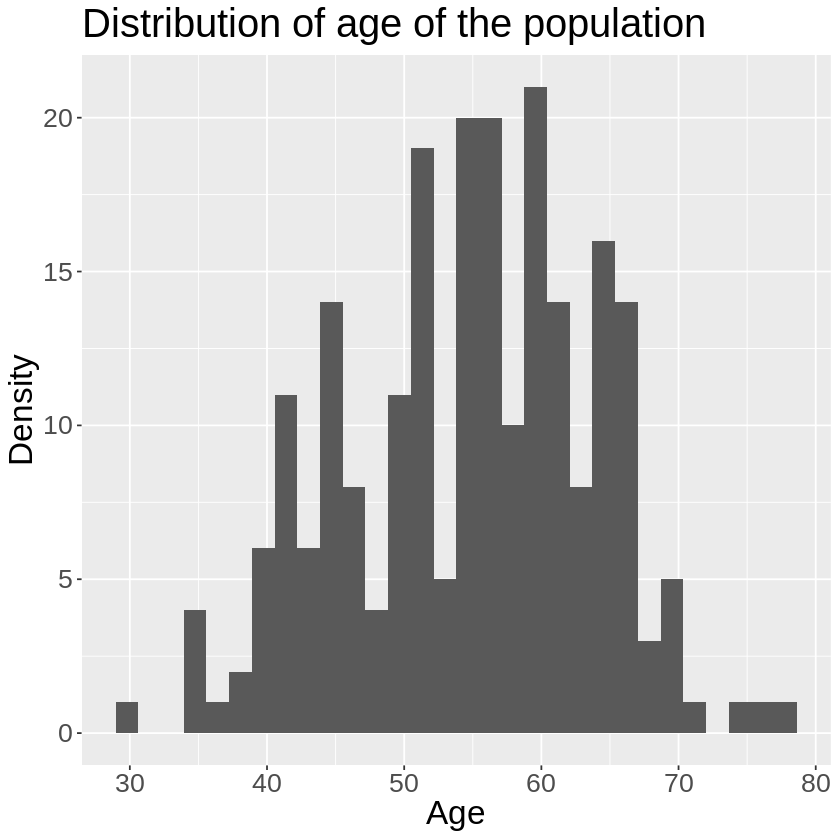

In [24]:
age_plot <- ggplot(training_data, aes(x = age)) +
  geom_histogram(bins = 30) +
  xlab("Age") + 
    ylab("Density") + 
ggtitle("Distribution of age of the population") +
theme(text = element_text(size = 20))

age_plot


Plot shows people around 50-60 have a higher chance of having a heart disease.